## Elevation Raster Data

In [47]:
import geopandas as gpd


import matplotlib.pyplot as plt
from matplotlib import colors

import rasterio
from rasterio.mask import mask

#### Download free digital terrain model from germany here: https://www.opendem.info/download_srtm.html

In [48]:
raster_file = 'opendem/srtm_germany_dtm.tif'

In [49]:
with rasterio.open(raster_file) as src:

    raster_data = src.read(1)

    profile = src.profile
    bounds = src.bounds
    resolution = src.res
    mean_val = raster_data.mean()
    max_val = raster_data.max()
    min_val = raster_data.min()

In [50]:
profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 13201, 'height': 10801, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.0008333333333333301, 0.0, 4.999583333333334,
       0.0, -0.0008333333333333301, 56.000416666666666), 'blockxsize': 13201, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}

In [51]:
bounds

BoundingBox(left=4.999583333333334, bottom=46.99958333333337, right=16.000416666666624, top=56.000416666666666)

In [52]:
resolution

(0.0008333333333333301, 0.0008333333333333301)

In [53]:
mean_val

np.float64(263.5623834682546)

In [54]:
max_val

np.int16(3730)

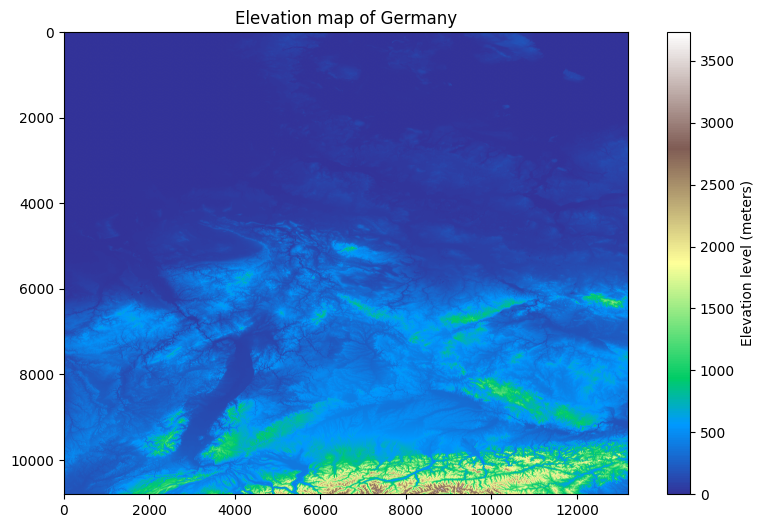

In [55]:
plt.figure(figsize=(10,6))
plt.imshow(raster_data, cmap = 'terrain')
plt.title('Elevation map of Germany')
plt.colorbar(label = 'Elevation level (meters)')

#### Clipping elevation raster file

In [56]:
gdf = gpd.read_file("nw_data/ne_10m_admin_0_countries.shp")
gdf = gdf[gdf.SOVEREIGNT=='Germany']

In [57]:
output_file = 'germany_elevation.tif'

In [58]:
with rasterio.open(raster_file) as src:
    geom = [gdf.geometry.unary_union]
    out_image, out_transform = mask(src, geom, crop = True)
    out_meta = src.meta.copy()
    out_meta.update({
        'drive' : 'GTiff',
        'height' : out_image.shape[1],
        'width' : out_image.shape[2],
        'transform' : out_transform
    })



C:\Users\saral\AppData\Local\Temp\ipykernel_23708\3318246557.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom = [gdf.geometry.unary_union]


In [59]:
with rasterio.open(output_file, 'w', **out_meta) as dest:
    dest.write(out_image)

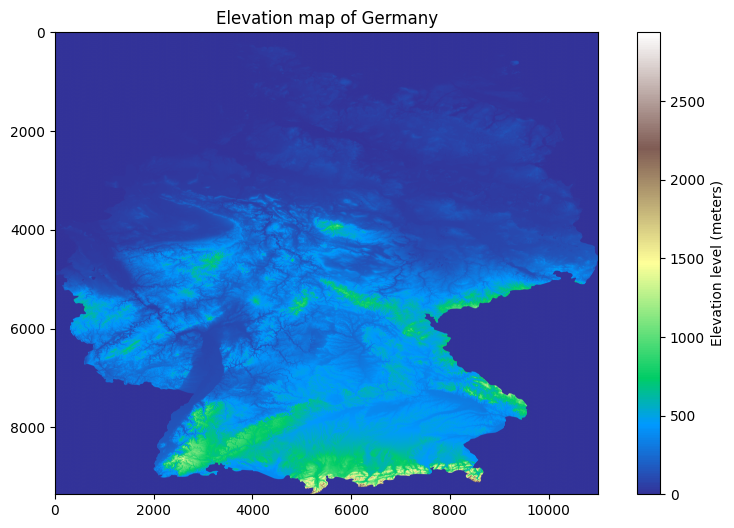

In [60]:
plt.figure(figsize=(10,6))
plt.imshow(out_image[0], 
           cmap = 'terrain')
plt.title('Elevation map of Germany')
plt.colorbar(label = 'Elevation level (meters)')